In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = '../MovieSummaries/'


awards = pd.read_csv('../the_oscar_award.csv', names = ['ReleaseYear','CeremonyYear' ,'Ceremony','Category','NomineeName',
                                                                      'MovieName','Winner'], skiprows=1)
popularity = pd.read_csv('../popularity.csv',  encoding='latin1')
bollywood = pd.read_csv('../bollywood_awards.csv')

movies = pd.read_csv('movies_preprocessed.tsv', delimiter= '\t')

In [49]:
movies

,WikiMovieID,FreebaseMovieID,MovieName,ReleaseDate,BORevenue,Runtime,Languages,Countries,MovieGenre,ReleaseYear
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},"{""/m/07s9rl0"": ""Drama""}",1983.0
...,...,...,...,...,...,...,...,...,...,...
53585,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/07s9rl0"": ""Drama""}",2011.0
53586,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011.0
53587,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972.0
53588,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992.0


In [50]:
popularity

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,Banderas Antonio,Abril Victoria,Almodóvar Pedro,68.0,No
1,1991,113.0,High Heels,Comedy,Bosé Miguel,Abril Victoria,Almodóvar Pedro,68.0,No
2,1983,104.0,Dead Zone The,Horror,Walken Christopher,Adams Brooke,Cronenberg David,79.0,No
3,1979,122.0,Cuba,Action,Connery Sean,Adams Brooke,Lester Richard,6.0,No
4,1978,94.0,Days of Heaven,Drama,Gere Richard,Adams Brooke,Malick Terrence,14.0,No
...,...,...,...,...,...,...,...,...,...
1654,1932,226.0,Shadow of the Eagle The,Action,Wayne John,NaN,NaN,19.0,No
1655,1989,103.0,Blood & Guns,Action,Welles Orson,NaN,NaN,43.0,No
1656,1988,78.0,Hot Money,Drama,Welles Orson,NaN,NaN,19.0,No
1657,1977,75.0,Comedy Tonight,Comedy,Williams Robin,NaN,NaN,18.0,No


In [51]:
bollywood

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,Samadhi (1950 film),tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,Samadhi,0,1950,165,Drama,6.1,21,The story is based on the true incident at INA...,The story is based on the true incident at INA...,NaN,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,NaN,NaN
4325,Sangram (1950 film),tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,Sangram,0,1950,139,Drama,6.2,20,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,NaN,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,NaN,NaN
4326,Sargam (1950 film),tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Melody,Sargam,0,1950,135,Drama|Family,6.8,21,NaN,Add a Plot »,NaN,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,NaN,4 February 1957 (Iran)
4327,Sheesh Mahal (1950 film),tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,Sheesh Mahal,0,1950,144,Drama,7.0,13,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,NaN,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,NaN,NaN


In [52]:
awards

,ReleaseYear,CeremonyYear,Ceremony,Category,NomineeName,MovieName,Winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


In [53]:
awards.describe()

,ReleaseYear,CeremonyYear,Ceremony
count,10765.000000,10765.000000,10765.000000
mean,1976.074222,1977.074222,49.098932
std,27.055841,27.055841,27.013986
min,1927.000000,1928.000000,1.000000
25%,1952.000000,1953.000000,25.000000
50%,1975.000000,1976.000000,48.000000
75%,2000.000000,2001.000000,73.000000
max,2022.000000,2023.000000,95.000000


In [54]:
awards.isna().any()

ReleaseYear     False
CeremonyYear    False
Ceremony        False
Category        False
NomineeName      True
MovieName        True
Winner          False
dtype: bool

Sum of NaN in each feature : 


ReleaseYear       0
CeremonyYear      0
Ceremony          0
Category          0
NomineeName       4
MovieName       315
Winner            0
dtype: int64

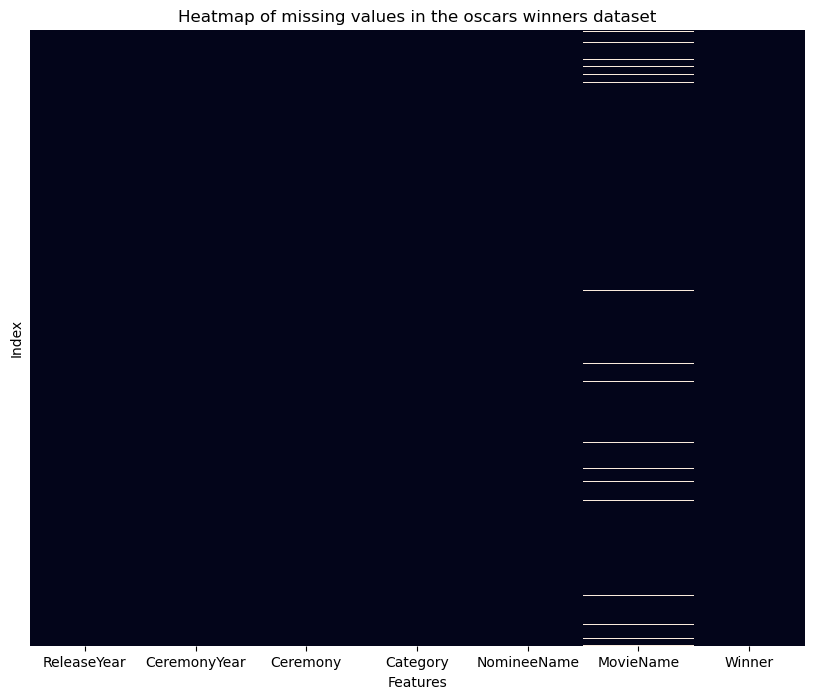

In [55]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(awards.isna(), yticklabels=False, cbar=False)
ax.set(xlabel="Features", ylabel="Index")
ax.set_title('Heatmap of missing values in the oscars winners dataset')

print('Sum of NaN in each feature : ')
awards.isna().sum(axis = 0)

In [56]:
awards = awards.drop(awards[awards['MovieName'].isnull()].index)
awards = awards.drop(awards[awards['NomineeName'].isnull()].index)


(array([1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

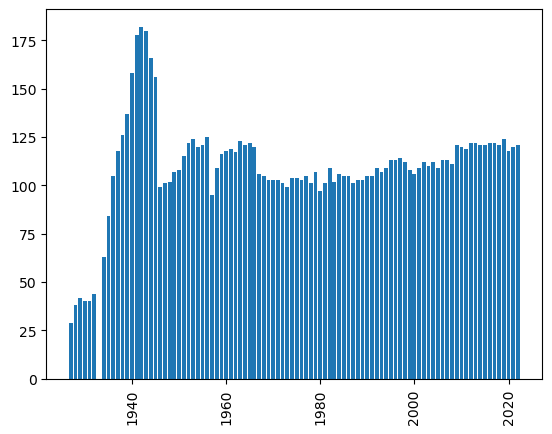

In [57]:
counts = awards['ReleaseYear'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation= 'vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'DIRECTING'),
  Text(1, 0, 'FILM EDITING'),
  Text(2, 0, 'ACTRESS IN A SUPPORTING ROLE'),
  Text(3, 0, 'ACTOR IN A SUPPORTING ROLE'),
  Text(4, 0, 'DOCUMENTARY (Short Subject)'),
  Text(5, 0, 'BEST PICTURE'),
  Text(6, 0, 'DOCUMENTARY (Feature)'),
  Text(7, 0, 'CINEMATOGRAPHY'),
  Text(8, 0, 'FOREIGN LANGUAGE FILM'),
  Text(9, 0, 'ART DIRECTION'),
  Text(10, 0, 'COSTUME DESIGN'),
  Text(11, 0, 'MUSIC (Original Score)'),
  Text(12, 0, 'SOUND'),
  Text(13, 0, 'ACTRESS'),
  Text(14, 0, 'ACTRESS IN A LEADING ROLE')])

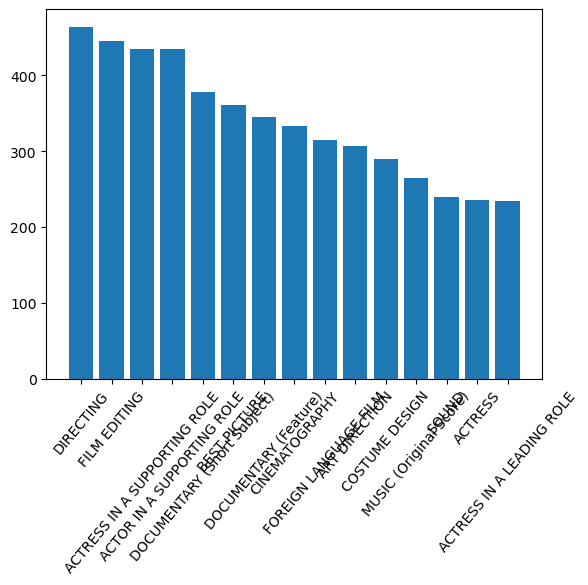

In [88]:
counts = awards['Category'].value_counts()
plt.bar(counts.index[:15], counts.values[:15])
plt.xticks(rotation= 50)

In [80]:
print(counts.index.tolist())

['DIRECTING', 'FILM EDITING', 'ACTRESS IN A SUPPORTING ROLE', 'ACTOR IN A SUPPORTING ROLE', 'DOCUMENTARY (Short Subject)', 'BEST PICTURE', 'DOCUMENTARY (Feature)', 'CINEMATOGRAPHY', 'FOREIGN LANGUAGE FILM', 'ART DIRECTION', 'COSTUME DESIGN', 'MUSIC (Original Score)', 'SOUND', 'ACTRESS', 'ACTRESS IN A LEADING ROLE', 'ACTOR IN A LEADING ROLE', 'ACTOR', 'MUSIC (Original Song)', 'SHORT FILM (Live Action)', 'MUSIC (Song)', 'SHORT FILM (Animated)', 'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)', 'CINEMATOGRAPHY (Black-and-White)', 'WRITING (Original Screenplay)', 'VISUAL EFFECTS', 'MUSIC (Music Score of a Dramatic or Comedy Picture)', 'ART DIRECTION (Black-and-White)', 'CINEMATOGRAPHY (Color)', 'MUSIC (Scoring of a Musical Picture)', 'WRITING (Screenplay Written Directly for the Screen)', 'ART DIRECTION (Color)', 'WRITING (Adapted Screenplay)', 'WRITING (Screenplay)', 'OUTSTANDING PRODUCTION', 'WRITING (Screenplay--based on material from another medium)', 'ANIMATED FEATURE FILM', 'SPECIAL EFFE

In [94]:
common_films = len(set(awards['MovieName']) & set(movies['MovieName']))
print('Percentage of common films between the awards and CMU movies compared to total CMU: ', common_films/len(movies['MovieName']))
print('Percentage of common films between the awards and CMU movies compared to total awards: ',common_films/len(awards['MovieName']))

Percentage of common films between the awards and CMU movies compared to total CMU:  0.05555140884493376
Percentage of common films between the awards and CMU movies compared to total awards:  0.2848803827751196


In [95]:
# movies in lower case
len(set(map(str.lower, awards['MovieName'])) & set(map(str.lower, movies['MovieName'])))/len(awards['MovieName'])

0.2917703349282297

regarder avec les dates

In [67]:
cmu_with_a= movies.merge(awards, on= ['MovieName', 'ReleaseYear'], how = 'inner')

In [81]:
# look at the movies where an actor or an actress won the award
# maybe investigate what genre of movie make an actor or actress win ? 
actors_main_cmu = cmu_with_a.loc[cmu_with_a['Category'].isin( ['ACTRESS', 'ACTOR', 'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE'])]
actors_supp_cmu = cmu_with_a.loc[cmu_with_a['Category'].isin( ['ACTRESS IN A SUPPORTING ROLE', 'ACTOR IN A SUPPORTING ROLE'])]

In [83]:
actors_supp_cmu

,WikiMovieID,FreebaseMovieID,MovieName,ReleaseDate,BORevenue,Runtime,Languages,Countries,MovieGenre,ReleaseYear,CeremonyYear,Ceremony,Category,NomineeName,Winner
22,1364293,/m/04wy0v,They Knew What They Wanted,1940,932000.0,96.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/02l7c8"": ""Romance Film"", ""/m/0hj3nbk"": ""M...",1940.0,1941,13,ACTOR IN A SUPPORTING ROLE,William Gargan,False
23,1369204,/m/04x8zs,Juarez,1939,NaN,125.0,"{'/m/02h40lc': 'English Language', '/m/06nm1':...",{'/m/09c7w0': 'United States of America'},"{""/m/04xvh5"": ""Costume drama"", ""/m/03bxz7"": ""B...",1939.0,1940,12,ACTOR IN A SUPPORTING ROLE,Brian Aherne,False
28,7767613,/m/026ccts,Star!,1968-07-18,4000000.0,176.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/017fp"": ""Biography"", ""/m/04t36"": ""Musical...",1968.0,1969,41,ACTOR IN A SUPPORTING ROLE,Daniel Massey,False
40,103021,/m/0p_sc,Midnight Express,1978-08-31,35000000.0,121.0,"{'/m/064_8sq': 'French Language', '/m/02h40lc'...","{'/m/09c7w0': 'United States of America', '/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hn10"": ""LGBT"", ...",1978.0,1979,51,ACTOR IN A SUPPORTING ROLE,John Hurt,False
82,4836072,/m/0cq7kw,My Fair Lady,1964-10-21,72000000.0,172.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/04xvh5"": ""Costume drama"", ""/m/0520lz"": ""R...",1964.0,1965,37,ACTOR IN A SUPPORTING ROLE,Stanley Holloway,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,142421,/m/011ydl,Babe,1995-08-04,254134910.0,89.0,{'/m/02h40lc': 'English Language'},"{'/m/09c7w0': 'United States of America', '/m/...","{""/m/03k9fj"": ""Adventure"", ""/m/01t_vv"": ""Comed...",1995.0,1996,68,ACTOR IN A SUPPORTING ROLE,James Cromwell,False
6413,2392280,/m/078sj4,Syriana,2005-11-23,93974620.0,126.0,"{'/m/0jzc': 'Arabic Language', '/m/02h40lc': '...",{'/m/09c7w0': 'United States of America'},"{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama...",2005.0,2006,78,ACTOR IN A SUPPORTING ROLE,George Clooney,True
6425,4057650,/m/0bfy61,To Be or Not to Be,1983-12-16,13030214.0,107.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/0hn10"": ""LGBT"", ""/m/0gf28"": ""Parody"", ""/m...",1983.0,1984,56,ACTOR IN A SUPPORTING ROLE,Charles Durning,False
6431,5440243,/m/0dl_jw,Beau Geste,1939,NaN,112.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/03k9fj"": ""Adventure"", ""/m/01j6zc"": ""Forei...",1939.0,1940,12,ACTOR IN A SUPPORTING ROLE,Brian Donlevy,False


regarder autres awards

In [96]:
# bollywood does not work
bolly_common_films = len(set(awards['MovieName']) & set(bollywood['title_y']))

In [97]:
bolly_common_films

34